<a href="https://colab.research.google.com/github/josko19kristic50/ICM-PROSPERITY/blob/main/raw_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

day_0 = pd.read_csv('prices_round_3_day_0.csv', sep=';')
day_1 = pd.read_csv('prices_round_3_day_1.csv', sep=';')
day_2 = pd.read_csv('prices_round_3_day_2.csv', sep=';')

concatenated_df = pd.concat([day_0, day_1, day_2])
concatenated_df.reset_index(drop=True, inplace=True)

strawberry_times = 6
chocolate_times = 4
roses_times = 1

premium = 50 # Gift wrap and all

In [6]:
complete_df = pd.DataFrame(concatenated_df.groupby('day')['timestamp'].unique()).explode('timestamp').reset_index()
complete_df['GIFT_BASKET'] = concatenated_df.query('product == "GIFT_BASKET"')['mid_price'].reset_index(drop=True)
complete_df['STRAWBERRIES'] = concatenated_df.query('product == "STRAWBERRIES"')['mid_price'].reset_index(drop=True)
complete_df['CHOCOLATE'] = concatenated_df.query('product == "CHOCOLATE"')['mid_price'].reset_index(drop=True)
complete_df['ROSES'] = concatenated_df.query('product == "ROSES"')['mid_price'].reset_index(drop=True)

complete_df['BASKET_SEPARATED'] = strawberry_times*complete_df['STRAWBERRIES'] + chocolate_times*complete_df['CHOCOLATE'] + complete_df['ROSES']
complete_df['SPREAD'] = complete_df['GIFT_BASKET'] - complete_df['BASKET_SEPARATED']
complete_df = complete_df[['day', 'GIFT_BASKET', 'STRAWBERRIES', 'CHOCOLATE', 'ROSES', 'SPREAD']]

In [7]:
complete_0 = complete_df.query('day == 0')
complete_1 = complete_df.query('day == 1')
complete_2 = complete_df.query('day == 2')

In [8]:
print(complete_0['SPREAD'].mean())
print(complete_1['SPREAD'].mean())
print(complete_2['SPREAD'].mean())


377.4340713407134
381.899
386.2418741874187


In [9]:
print(complete_0['SPREAD'].std())
print(complete_1['SPREAD'].std())
print(complete_2['SPREAD'].std())


85.8854975757935
65.90015540230695
76.15893194045354


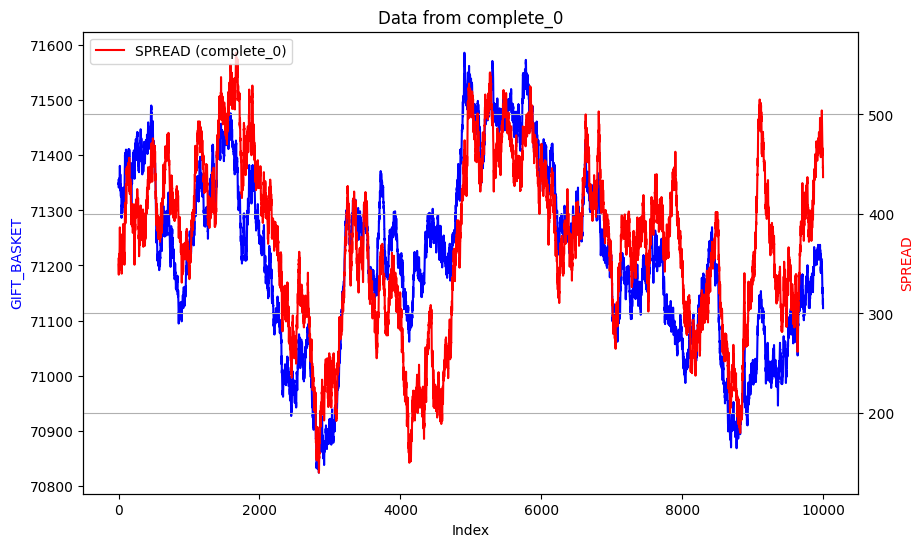

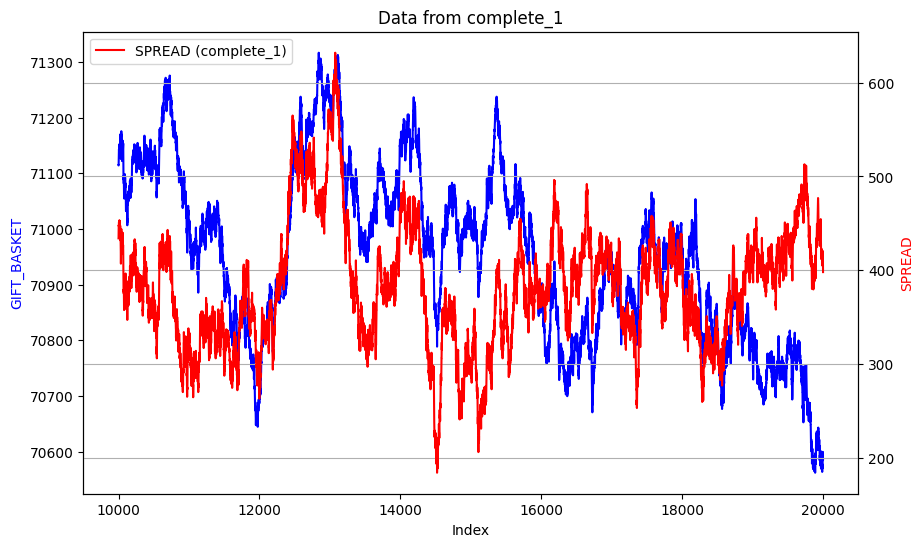

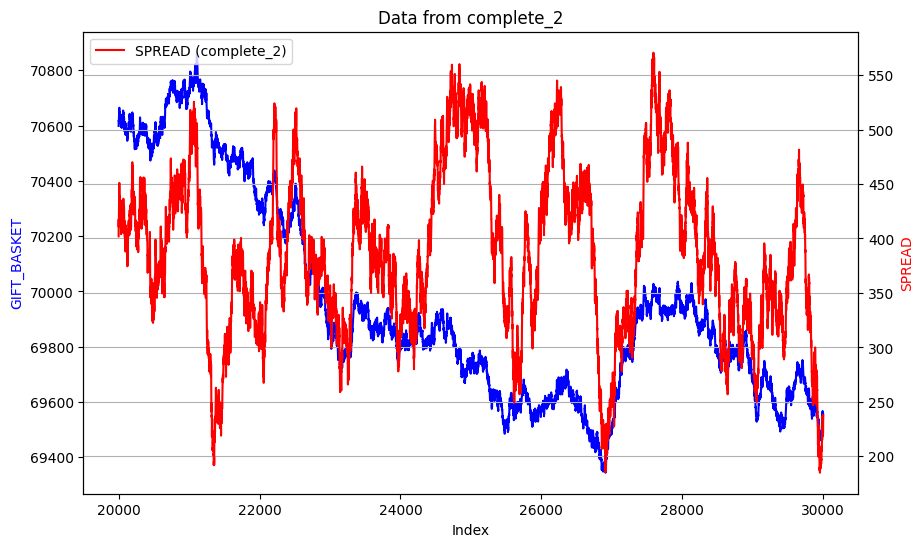

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming complete_0, complete_1, and complete_2 are dataframes with columns GIFT_BASKET and SPREAD

# Plot for complete_0
plt.figure(figsize=(10, 6))
plt.plot(complete_0['GIFT_BASKET'], label='GIFT_BASKET (complete_0)', color='blue')
plt.ylabel('GIFT_BASKET', color='blue')
plt.xlabel('Index')
plt.twinx()
plt.plot(complete_0['SPREAD'], label='SPREAD (complete_0)', color='red')
plt.ylabel('SPREAD', color='red')
plt.title('Data from complete_0')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Plot for complete_1
plt.figure(figsize=(10, 6))
plt.plot(complete_1['GIFT_BASKET'], label='GIFT_BASKET (complete_1)', color='blue')
plt.ylabel('GIFT_BASKET', color='blue')
plt.xlabel('Index')
plt.twinx()
plt.plot(complete_1['SPREAD'], label='SPREAD (complete_1)', color='red')
plt.ylabel('SPREAD', color='red')
plt.title('Data from complete_1')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Plot for complete_2
plt.figure(figsize=(10, 6))
plt.plot(complete_2['GIFT_BASKET'], label='GIFT_BASKET (complete_2)', color='blue')
plt.ylabel('GIFT_BASKET', color='blue')
plt.xlabel('Index')
plt.twinx()
plt.plot(complete_2['SPREAD'], label='SPREAD (complete_2)', color='red')
plt.ylabel('SPREAD', color='red')
plt.title('Data from complete_2')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

<Axes: >

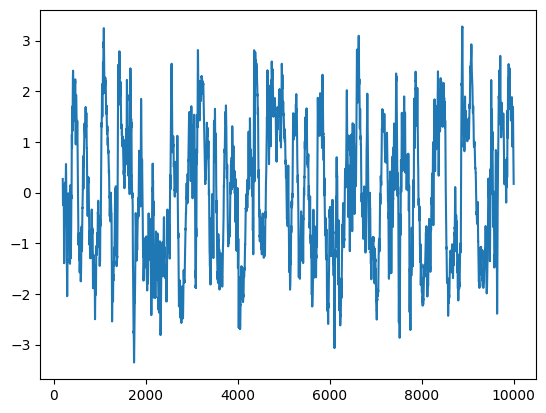

In [ ]:
df = complete_0
day = '0'

window = 200

spread = df['SPREAD']

avg_rolling_spread = spread.rolling(window)\
    .mean()

mov_spread5 = spread.rolling(5).mean()

rolling_std_spread = spread.rolling(window)\
    .std()

zscore_spread = (mov_spread5 - avg_rolling_spread)/rolling_std_spread
zscore_spread.plot()

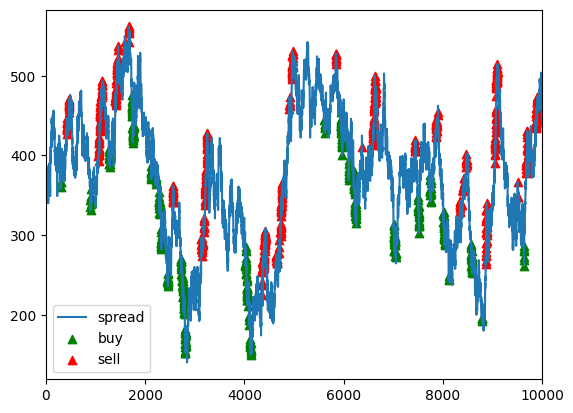

In [ ]:
buy = zscore_spread < -2
sell = zscore_spread > 2

plt.plot(spread[:10000], label='spread')
plt.scatter(spread.index[:10000][buy[:10000]], spread[:10000][buy[:10000]], marker='^', color='green', label='buy')
plt.scatter(spread.index[:10000][sell[:10000]], spread[:10000][sell[:10000]], marker='^', color='red', label='sell')

plt.legend()
plt.xlim([0, 10000])

plt.show()


In [ ]:
spread[sell].shape, spread[buy].shape

((657,), (509,))

In [ ]:
position_size = (spread[buy].shape[0] - spread[sell].shape[0])

In [ ]:
pnl = (spread[sell].sum() - spread[buy].sum() - position_size*spread.iloc[-1])

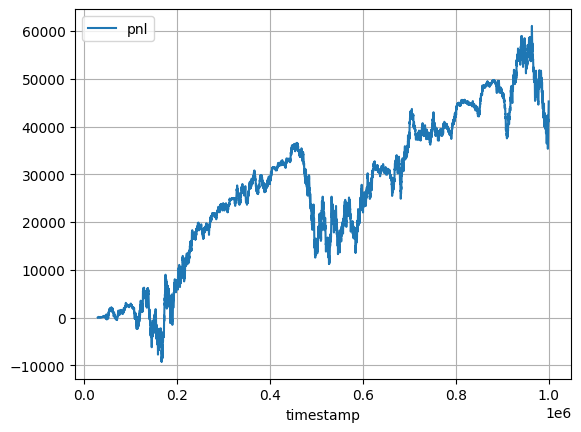

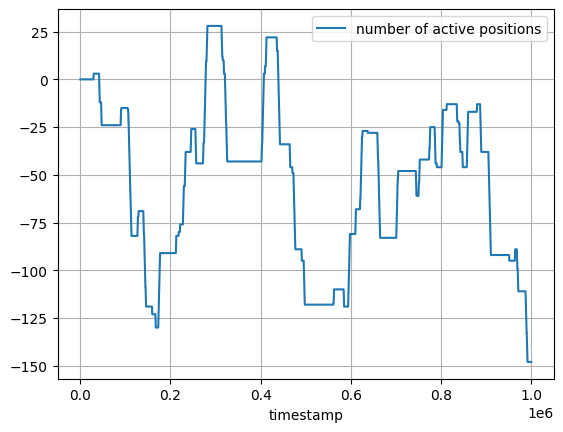

In [ ]:
gift_basket = concatenated_df.query("product == 'GIFT_BASKET' & day == 0").set_index("timestamp")

cash = pd.concat([spread[sell], -spread[buy]])\
    .sort_index()\
    .cumsum()\
    .reindex(gift_basket.index)\
    .fillna(method="ffill")

position = pd.Series(0, index = gift_basket.index)
spread.index = gift_basket.index
sell.index = gift_basket.index
buy.index = gift_basket.index

for idx, value in spread[sell].items():
    position.loc[idx] = -1

for idx, value in spread[buy].items():
    position.loc[idx] = 1

position = position.cumsum()
value_on_position = (position * spread).fillna(method="ffill")
pnl = value_on_position + cash

pnl.plot(
    label = "pnl"
)
plt.grid()
plt.legend()


plt.figure()
position.plot(
    label = "number of active positions"
)
plt.grid()
plt.legend()

<Axes: >

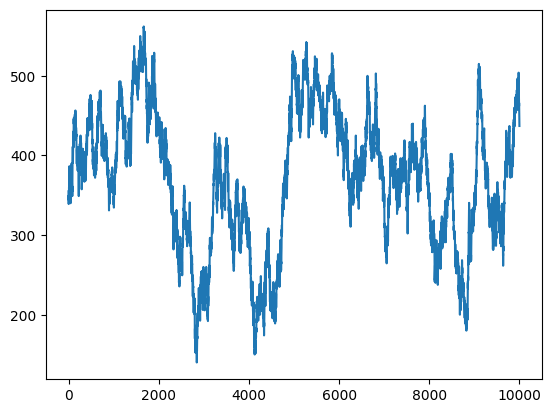

In [ ]:
df['SPREAD'].plot()